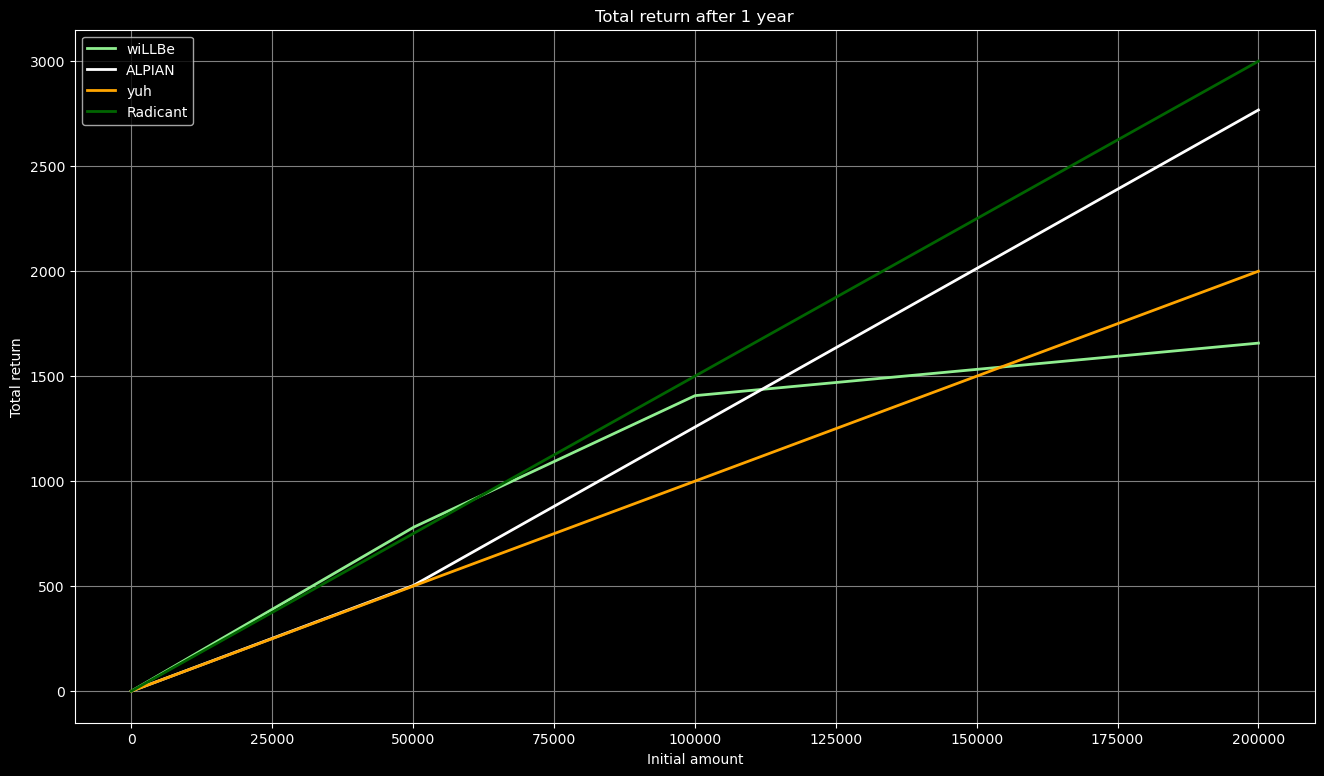

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def calculate_ear(i, n, t=1):
    if n == 1: return i
    return (1 + i/n)**(n*t) - 1

def calculate_return(amount, ear_tiers):
    return sum(min(max_amount - tier_start, amount - tier_start) * ear
               for (tier_start, max_amount, ear) in ear_tiers
               if amount > tier_start)

def calculate_returns_for_all_amounts(initial_amounts, ear_tiers):
    return [calculate_return(amount, ear_tiers) for amount in initial_amounts]

def calculate_ear_vectorized(i, n, t=1):
    # Vectorized version of calculate_ear for arrays
    return (1 + i/n)**(n*t) - 1

def calculate_return_vectorized(amounts, ear_tiers):
    # Vectorized calculation of returns for a range of amounts
    returns = np.zeros_like(amounts)
    for tier_start, max_amount, ear in ear_tiers:
        tier_amounts = np.clip(amounts - tier_start, 0, max_amount - tier_start)
        returns += tier_amounts * ear
    return returns

def create_and_show_figure(initial_amounts, accounts, colors):
    plt.figure(figsize=(16, 9), facecolor='black')  # Set facecolor to black
    plt.style.use('dark_background')
    for account, color in zip(accounts.items(), colors.items()):
        name, ear_tiers = account
        returns = calculate_return_vectorized(initial_amounts, ear_tiers)
        plt.plot(initial_amounts, returns, color=color[1], linewidth=2, label=name)
    plt.title('Total return after 1 year')
    plt.xlabel('Initial amount')
    plt.ylabel('Total return')
    plt.grid(color='grey')
    plt.legend()
    plt.savefig('total_return.png', facecolor='black')
    plt.show()

def create_and_show_figure_plotly(initial_amounts, accounts, colors):
    fig = make_subplots()
    for account, color in zip(accounts.items(), colors.items()):
        name, ear_tiers = account
        returns = calculate_return_vectorized(initial_amounts, ear_tiers)
        fig.add_trace(go.Scatter(x=initial_amounts, y=returns, mode='lines', name=name, line=dict(color=color[1])))

    fig.update_layout(title='Total return after 1 year',
                      xaxis_title='Initial amount',
                      yaxis_title='Total return',
                      plot_bgcolor='black',
                      paper_bgcolor='black',
                      font=dict(color='white'),
                      legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

    fig.write_html('total_return.html')

# Generate a range of initial amounts
amount_availiable = 200000
resolution = 1 # in CHF
initial_amounts = np.linspace(0, amount_availiable, int(amount_availiable / resolution))

# Define the EAR tiers for each account
accounts = {
    'wiLLBe': [(0, 50000, calculate_ear(0.0155, 4)),
               (50000, 100000, calculate_ear(0.0125, 4)),
               (100000, float('inf'), calculate_ear(0.0025, 4))],
    'ALPIAN': [(0, 50000, calculate_ear(0.01, 12)),
               (50000, float('inf'), calculate_ear(0.015, 12))],
    'yuh': [(0, float('inf'), calculate_ear(0.01, 1))],
    'Radicant': [(0, 250000, calculate_ear(0.015, 1))]
}

colors = {
    'wiLLBe': 'lightgreen',
    'ALPIAN': 'white',
    'yuh': 'orange',
    'Radicant': 'darkgreen'
}

# Create the figure and show it
create_and_show_figure(initial_amounts, accounts, colors)

# Create the figure and show it with plotly
create_and_show_figure_plotly(initial_amounts, accounts, colors)